# Segmentation using Kmean Clustering on Flight Company

Use airline customer data to classify customers, analyze characteristics of different customer categories, compare customer values ​​of different customer categories, provide personalized services to customer categories of different values, and formulate Corresponding marketing strategy.
Data description:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.5
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive') #mounted on google drives

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Collection

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Phyton/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.isna().sum()/len(df)*100

MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602273
WORK_PROVINCE        5.156538
WORK_COUNTRY         0.041278
AGE                  0.666794
LOAD_TIME            0.000000
FLIGHT_COUNT         0.000000
BP_SUM               0.000000
SUM_YR_1             0.874770
SUM_YR_2             0.219089
SEG_KM_SUM           0.000000
LAST_FLIGHT_DATE     0.000000
LAST_TO_END          0.000000
AVG_INTERVAL         0.000000
MAX_INTERVAL         0.000000
EXCHANGE_COUNT       0.000000
avg_discount         0.000000
Points_Sum           0.000000
Point_NotFlight      0.000000
dtype: float64

since null data is about 5%. It can be deleted.

## Handle Missing Value and Duplicate Rows

In [ ]:
#General Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE  columns should be of type datetime not object. Age should be int

There are null value in LAST_FLIGHT_DATE

In [ ]:
# Find out if there is any potential of duplicated columns or not based on column names
df.columns

# There is no suspected duplicate column

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
# add variable for categorical and numerical value
# numerical
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
#Categorical
categorical = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

## Statistical Summary

In [ ]:
df[numeric].describe().apply(lambda x: x.apply('{0:.5f}'.format))

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.00000,62988.00000,62568.00000,62988.00000,62988.00000,62437.00000,62850.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000
mean,31494.50000,4.10216,42.47635,11.83941,10925.08125,5355.37606,5604.02601,17123.87869,176.12010,67.74979,166.03390,0.31978,0.72156,12545.77710,2.72815
std,18183.21371,0.37386,9.88591,14.04947,16339.48615,8109.45015,8703.36425,20960.84462,183.82222,77.51787,123.39718,1.13600,0.18543,20507.81670,7.36416
min,1.00000,4.00000,6.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,15747.75000,4.00000,35.00000,3.00000,2518.00000,1003.00000,780.00000,4747.00000,29.00000,23.37037,79.00000,0.00000,0.61200,2775.00000,0.00000
50%,31494.50000,4.00000,41.00000,7.00000,5700.00000,2800.00000,2773.00000,9994.00000,108.00000,44.66667,143.00000,0.00000,0.71186,6328.50000,0.00000
75%,47241.25000,4.00000,48.00000,15.00000,12831.00000,6574.00000,6845.75000,21271.25000,268.00000,82.00000,228.00000,0.00000,0.80948,14302.50000,1.00000
max,62988.00000,6.00000,110.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,46.00000,1.50000,985572.00000,140.00000


Observation:
1. There are 15 numerical features
2. MEMBER_NO, FFP_TIER and avg_discount are normal distribution.
3. Other features are positively skewed distribution (Mean > Median).
4. SUM_YR_1 and SUM_YR_2 there are 0 value.
5. There are customer with age 110 years old. It need to be deleted.

### Data Cleaning

### Handling Incorrect Value


In [ ]:
df_clean = df.copy()

In LAST_FLIGHT_DATE column that there is an incorrect value, 2014/2/29, where there should be no such date.

In [ ]:
df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [ ]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df_clean), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %



Because the incorrect data in the LAST_FLIGHT_DATE column is only 0.007%, drop the rows

In [ ]:
df_clean.drop(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

## Convert Datetime from Object

In [ ]:
date = ["FFP_DATE","FIRST_FLIGHT_DATE","LAST_FLIGHT_DATE", "LOAD_TIME"]

for col in date:
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

df_clean.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


### Cleansing Missing Value

In [ ]:
data_missing_value = df_clean.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,WORK_PROVINCE,3226,5.156
1,WORK_CITY,2255,3.604
2,SUM_YR_1,551,0.881
3,AGE,419,0.670
4,SUM_YR_2,138,0.221
5,WORK_COUNTRY,25,0.040
6,GENDER,3,0.005


Highest percentage data_missing is 'WORK_PROVINCE' with value 5.157%

### Handling Missing Value

For columns SUM_YR_1, AGE, SUM_YR_2, WORK_COUNTRY, GENDER	 because the missing value is below 1%, we will drop these rows

In [ ]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER', 'LAST_FLIGHT_DATE']
for col in missing_col:
  df_clean.dropna(subset=[col], inplace=True)

For the WORK_CITY and WORK_PROVINCE columns, we will enter the mode value of each column in the missing row.

In [ ]:
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,MEMBER_NO,0
1,FFP_DATE,0
2,FIRST_FLIGHT_DATE,0
3,GENDER,0
4,FFP_TIER,0
5,WORK_CITY,0
6,WORK_PROVINCE,0
7,WORK_COUNTRY,0
8,AGE,0
9,LOAD_TIME,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  float64       
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM

In [ ]:
df_clean.dropna()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


### Feature Engineering

In [ ]:
df_clean['MEMBER_DURATION'] = ((df_clean['LOAD_TIME'] - df_clean['FFP_DATE'])/np.timedelta64(1, 'M'))
df_clean['MEMBER_DURATION'] = df_clean['MEMBER_DURATION'].astype(int)

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
numeric = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight',
 'MEMBER_DURATION']

In [ ]:
#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float) & (df_clean.columns != 'publish_daytype') & ((df_clean.columns != 'trending_daytype'))].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

## Normal Distribution and Outlier

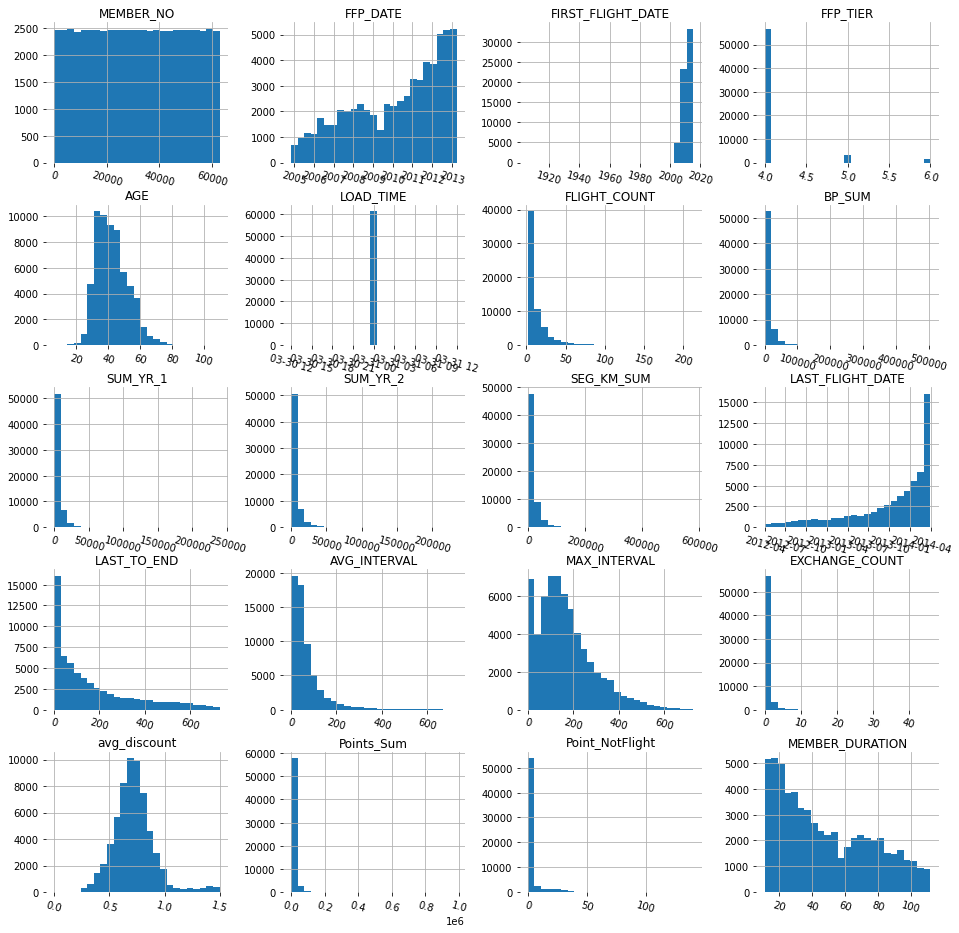

In [ ]:
h = df_clean.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

The majority of columns appear to have a positive skewed distribution, except for the MEMBER_NO, FFP_TIER and avg_discount columns

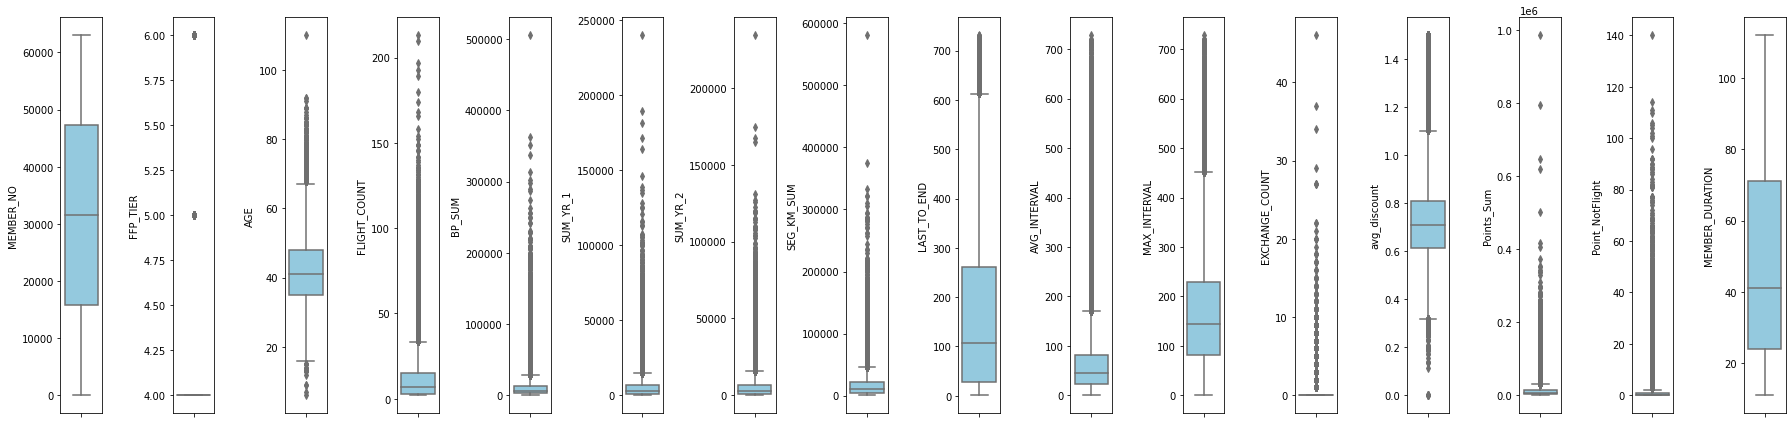

In [ ]:
#Univariate Analysis
# adjust the figure size for better readability
plt.figure(figsize=(25,6))

# plotting
features = df_clean.select_dtypes('number').columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_clean[features[i]], color='skyblue')
    plt.tight_layout()

The majority of the columns have outliers, except for the MEMBER_NO, FFP_TIER and MEMBER_DURATION columns

### Multicoleniarity Analysis

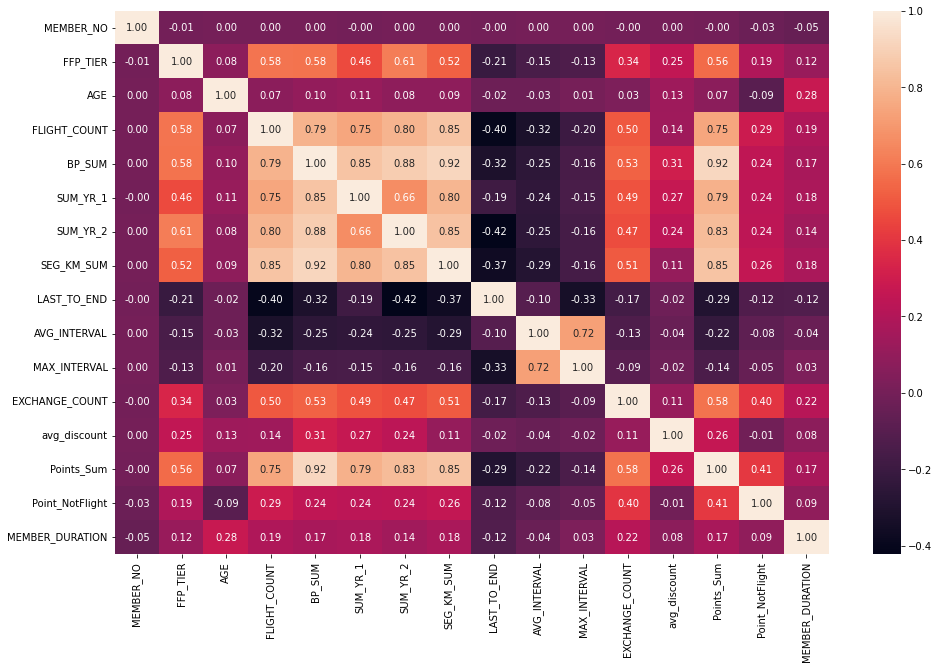

In [ ]:
corr_= df_clean.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f")



It can be seen that there is a correlation between several attributes, assuming > 0.7 has a fairly strong positive correlation:

    FIRST_FLIGHT_DATE correlation with FFP_DATE = 0.86
    Correlation of WORK_PROVINCE with WORK_CITY = 0.81
    Correlation of WORK_PROVINCE with WORK_COUNTRY = 0.70
    Correlation of WORK_PROVINCE with WORK_CITY` = 0.85
    BP_SUM correlation with FLIGHT_COUNT = 0.79
    Correlation of FLIGHT_COUNT with FFP_TIER = 0.58
    Correlation SUM_YR_1 with FLIGHT_COUNT = 0.75
    Correlation SUM_YR_1 with BP_SUM = 0.85
    Correlation of SUM_YR_1 with SEG_KM_SUM = 0.80
    Correlation SUM_YR_1 with Points_Sum = 0.79
    Correlation of SUM_YR_2 with FLIGHT_COUNT = 0.80
    Correlation of SUM_YR_2 with BP_SUM = 0.88
    Correlation of SUM_YR_2 with SEG_KM_SUM = 0.85
    Correlation SUM_YR_2 with Points_Sum = 0.83
    SEG_KM_SUM correlation with FLIGHT_COUNT = 0.85
    SEG_KM_SUM correlation with BP_SUM = 0.92
    Points_Sum correlation with FLIGHT_COUNT = 0.75
    Points_Sum correlation with BP_SUM = 0.92
    Points_Sum correlation with SEG_KM_SUM = 0.85
    Correlation MAX_INTERVAL with AVG_INTERVAL = 0.72



Many columns have a strong positive correlation with each other


### Outlier Handling

From the EDA process, it can be seen that there are customers who are 110 years old. Can be considered as an anomaly, therefore the data is deleted

In [ ]:
df_clean.drop(df_clean[df_clean.AGE > 100].index, inplace = True)

From the results of previous observations, it appears that there is a ticket price column with a value of 0. Then checks are also made on the total distance of flights that have been carried out and the average discount obtained.

Here we can see that there are flight data with ticket prices 0, the average discount is 0, but the total flight distance is more than 0. It can be considered as an anomaly, and because the number is small (7 rows), we can drop these rows.

In [ ]:
df_clean.drop(df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)].index, inplace = True)

### Feature Selection
RFM: Recency, Frequency, and Monetary
Using the RFM concept as shown above in performing feature selection:

Recency -> column LAST_TO_END (Distance from last flight time to last flight order)
Frequency -> column FLIGHT_COUNT (Number of customer flights)
Monetary -> column SEG_KM_SUM (For the monetary column, as an adjustment in the airline business, this feature is replaced by accumulated flight hours within a certain period of time)

Then there are also columns that are considered important in assessing customer value in the aviation business, namely:
Loyalty -> column MEMBER_DURATION (Membership length, which reflects whether the member is an existing customer)
Cabin -> column avg_discount (Discount factor related to cabin class, reflecting high and low customer value)

These columns will be used in the clustering process


In [ ]:
df_select = df_clean.copy()

In [ ]:
df_select = df_select[['MEMBER_DURATION','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_select.sample(5)

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
50151,59,221,6,3618,0.754865
28404,87,197,3,5498,1.466000
41336,67,13,9,7299,0.597323
49006,65,197,3,4171,0.699341
25575,103,40,14,12456,0.743956


In [ ]:
df_select.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,61429.00000,61429.00000,61429.00000,61429.00000,61429.00000
mean,48.21576,173.55024,11.94096,17277.61092,0.72173
std,27.81895,181.47395,14.11951,21055.46042,0.18470
min,11.00000,1.00000,2.00000,368.00000,0.11204
25%,24.00000,28.00000,3.00000,4850.00000,0.61257
50%,41.00000,107.00000,7.00000,10150.00000,0.71181
75%,71.00000,262.00000,15.00000,21433.00000,0.80900
max,112.00000,731.00000,213.00000,580717.00000,1.50000


## Scaling

In [ ]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df_select.astype(float))

## Modelling

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_std)

In [ ]:
df_select_std = pd.DataFrame(data=data_std, columns=list(df_select))

In [ ]:
df_select_std['clusters'] = kmeans.labels_
df_select['clusters'] = kmeans.labels_

In [ ]:
df_select.head(3)

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,clusters
0,88,1,210,580717,0.961639,3
1,85,7,140,293678,1.252314,3
2,85,11,135,283712,1.254676,3


Evaluation

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

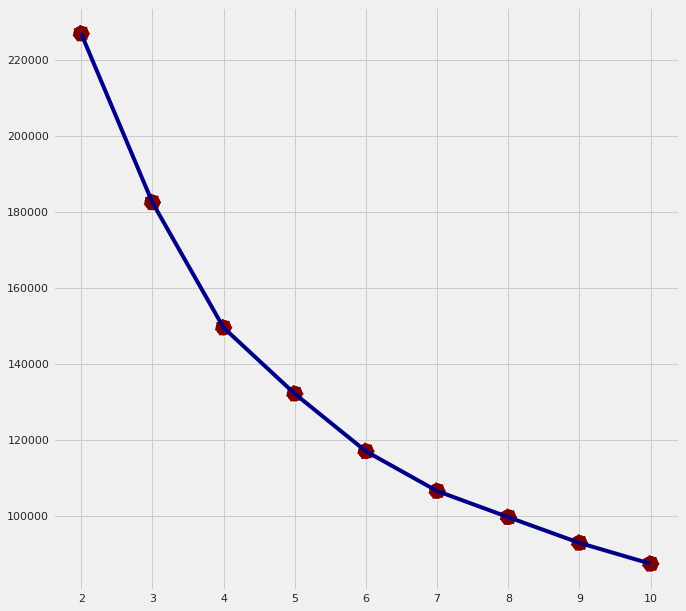

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

From the result of elbow method,  i confuse to choose k value which are 4, 5, 6

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_std)

No handles with labels found to put in legend.


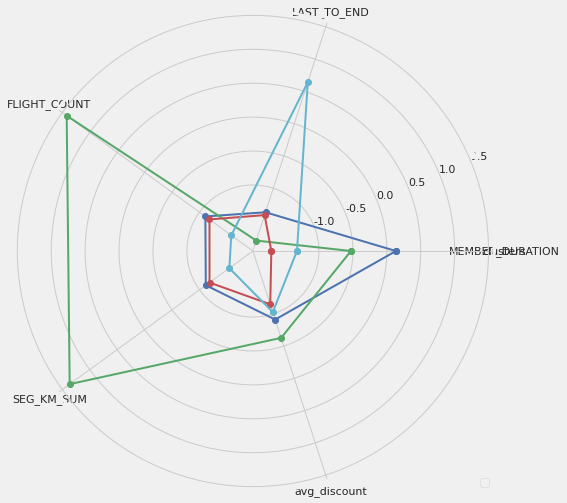

In [ ]:
k=4 # number of clusters

kmodel = KMeans(n_clusters=k, random_state=0)
kmodel.fit(data_std)
kmodel.cluster_centers_
kmodel.labels_
pd.Series(kmodel.labels_).value_counts() # cluster count

import numpy as np
import matplotlib.pyplot as plt

labels = df_select.columns

k = 5
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] 

plot_data = kmodel.cluster_centers_

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

fig = plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)

for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'clusters'+str(i), linewidth=2)

plt.show()

When k takes a value of 4, the cluster performance is not obvious in terms of membership time and average discount rate, and the clustering effect is not optimal.

No handles with labels found to put in legend.


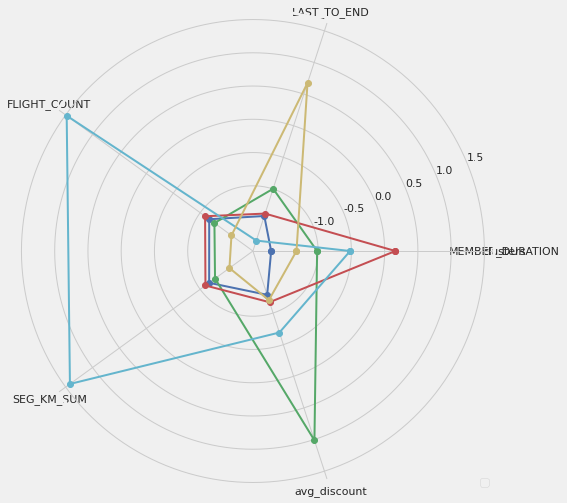

In [ ]:
k=5 # number of clusters

kmodel = KMeans(n_clusters=k, random_state=0)
kmodel.fit(data_std)
kmodel.cluster_centers_
kmodel.labels_
pd.Series(kmodel.labels_).value_counts() # cluster count

import numpy as np
import matplotlib.pyplot as plt

labels = df_select_std.columns

k = 5
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] 

plot_data = kmodel.cluster_centers_

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

fig = plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)

for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'cluster'+str(i), linewidth=2)

plt.show()

When the value of k is 5, the analysis result is more reasonable, and the five types of people divided have their own characteristics and do not repeat each other.

No handles with labels found to put in legend.


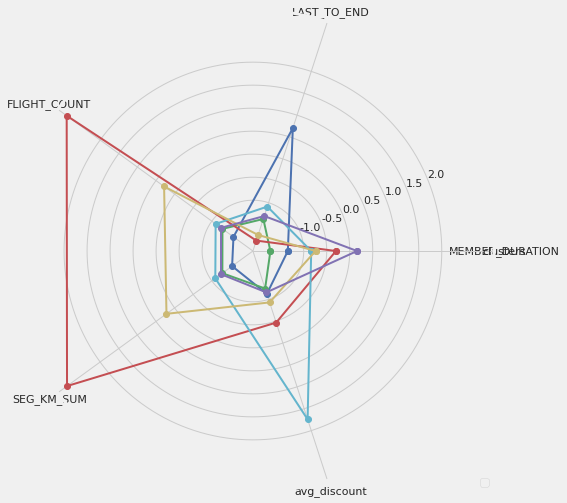

In [ ]:
k=6 # number of clusters

kmodel = KMeans(n_clusters=k, random_state=0)
kmodel.fit(data_std)
kmodel.cluster_centers_
kmodel.labels_
pd.Series(kmodel.labels_).value_counts() # cluster count

import numpy as np
import matplotlib.pyplot as plt

labels = df_select_std.columns

k = 5
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y','m'] 

plot_data = kmodel.cluster_centers_

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

fig = plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)

for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'cluster'+str(i), linewidth=2)

plt.show()

When the value of k is 6, various groups of people also have their own characteristics, but the first cluster is completely similar to the fourth cluster, and the clustering is slightly redundant.

In [ ]:
df_select[['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').median()

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
clusters,,,,,
0,27.0,77.0,8.0,10917.0,0.683570
1,44.0,148.0,6.0,7532.0,1.000000
2,80.0,77.0,9.0,12569.0,0.700000
3,62.0,13.0,42.0,59205.0,0.749862
4,32.0,474.0,3.0,4437.0,0.700000


No handles with labels found to put in legend.


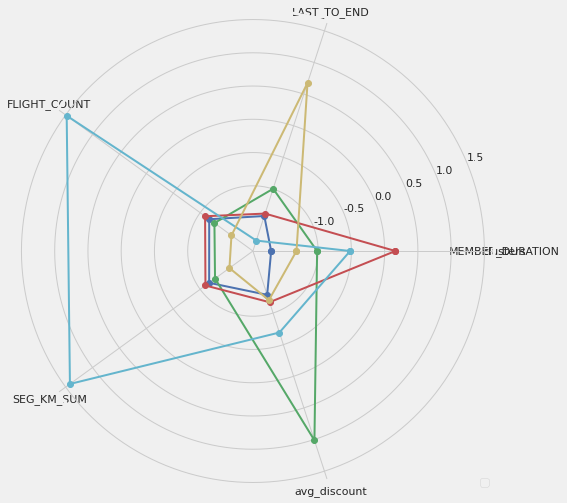

In [ ]:
k=5 # number of clusters

kmodel = KMeans(n_clusters=k, random_state=0)
kmodel.fit(data_std)
kmodel.cluster_centers_
kmodel.labels_
pd.Series(kmodel.labels_).value_counts() # cluster count

import numpy as np
import matplotlib.pyplot as plt

labels = df_select_std.columns

k = 5
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] 

plot_data = kmodel.cluster_centers_

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

fig = plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)

for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'cluster'+str(i), linewidth=2)

plt.show()

In [ ]:
color = ['b', 'g', 'r', 'c', 'y'] 

In [ ]:
df_select['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,0,24103
1,2,15366
2,4,11888
3,3,5263
4,1,4809


1. avg_discout: The average discount that customers get
2. SEG_KM_SUM: Total distance (km) flights that have been done
3. FLIGHT_COUNT: Number of customer flights
4. LAST_TO_END: last flight time to last flight order interval
5. MEMBER_DURATION: The member duration year.

Cluster 0 (blue)(24103 members):
1. Passenggers who have low discount that customers get (average)
2. Passenggers who have Low Total distance (km) flights that have been done
3. Passengger who have low Number of customer flights
4. Passengger who have low last flight time to last flight order interval
5. assengger who have high member duration.
Cluster 0 is passenggers who is long time member.

They may have taken a few flights and have not taken the airline ’s plane again. They are considered lost customers. You should try to grasp the latest information of these customers, maintain interaction with customers, and adopt certain marketing methods such as preferential measures and cross-selling to restore such customers.

Cluster 2 (Red) (15366 members):
1. Passenggers who have Medium discount that customers get (average)
2. Passenggers who have High Total distance (km) flights that have been done
3. Passengger who have High Number of customer flights
4. Passengger who have low last flight time to last flight order interval
5. Passengger who have medium member duration.
Cluster 2 is Frequent Flyer passenggers.
This type of customer is a high-value customer, generally a high-end customer Business personnel in the cabin are the key to maintaining and developing, and can adopt relevant preferential policies such as member upgrade measures to increase their number of rides.


Cluster 4 (Yellow) (11888 members):
1. Passenggers who have High discount that customers get (average)
2. Passenggers who have low Total distance (km) flights that have been done
3. Passengger who have low Number of customer flights
4. Passengger who have high last flight time to last flight order interval
5. Passengger who have low member duration.
Cluster 4 is customer who fly due to discount program.
It is usually an occasional consumption, which may be due to seasonal reasons or related to promotional activities. For such users, it is necessary to maintain and stimulate consumption as much as possible.

Cluster 3 (Cyan) (5263 members):
1. Passenggers who have Low discount that customers get (average)
2. Passenggers who have low Total distance (km) flights that have been done
3. Passengger who have low Number of customer flights
4. Passengger who have high last flight time to last flight order interval
5. assengger who have low member duration.
Cluster 3 is passengers who used our flight lately.
Need to maintain well, you can also use member upgrade measures.

Cluster 1 (Green) (4809 members):
1. Passenggers who have Low discount that customers get (average)
2. Passenggers who have Low Total distance (km) flights that have been done
3. Passengger who have low Number of customer flights
4. Passengger who have low last flight time to last flight order interval
5. assengger who have short member duration.
Cluster 1 is passenggers who doesnt interested with the company flight (flight rarely)
It has low data in all aspects and belongs to low-value users. For these users, they should be maintained as much as possible, and then stimulate their consumption to stimulate their consumption vitality.

Conclusion:

1. The highest cluster passenger may have taken a few flights and have not taken the airline ’s plane again. They are considered lost customers. You should try to grasp the latest information of these customers, maintain interaction with customers, and adopt certain marketing methods such as preferential measures and cross-selling to restore such customers.
2. Airflight is a high-value customer, generally a high-end customer Business personnel in the cabin are the key to maintaining and developing, and can adopt relevant preferential policies such as member upgrade measures to increase their number of rides.
3. Many new customer/passenger is customer who fly due to discount program.
It is usually an occasional consumption, which may be due to seasonal reasons or related to promotional activities. For such users, it is necessary to maintain and stimulate consumption as much as possible.
4. There are passenger who used our flight lately. Need to maintain well, you can also use member upgrade measures.
5. There are few number of passenger has low data in all aspects and belongs to low-value users. For these users, they should be maintained as much as possible, and then stimulate their consumption to stimulate their consumption vitality.